# Eksperimen Operasi Dasar pada Sinyal Suara dan Citra Digital (Penjumlahan, Shift, Amplifikasi)

Tujuan: mendemokan 3 operasi dasar pada sinyal & citra: penjumlahan, penggeseran (shift), amplifikasi.
Kasus nyata:

Audio : mixing dua nada (penjumlahan), delay (shift), perbesar volume (amplifikasi).

Gambar produk : overlay warna (penjumlahan), translasi posisi (shift), tingkatkan brightness (amplifikasi).

Untuk tiap eksperimen, ditampilkan kode, hasil visual, catatan singkat/refleksi.

# Import & utilitas umum

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import cv2

# Konfigurasi plotting
def show(title=None):
    if title: plt.title(title)
    plt.show()

# Utility aman untuk menampilkan citra RGB
def imshow_rgb(img, title=None):
    plt.imshow(img)
    plt.axis("off")
    if title: plt.title(title)
    plt.show()

# Seed biar hasil konsisten
np.random.seed(42)

# Operasi pada Sinyal Audio

### Generate sinyal dasar (440 Hz, 1 detik)

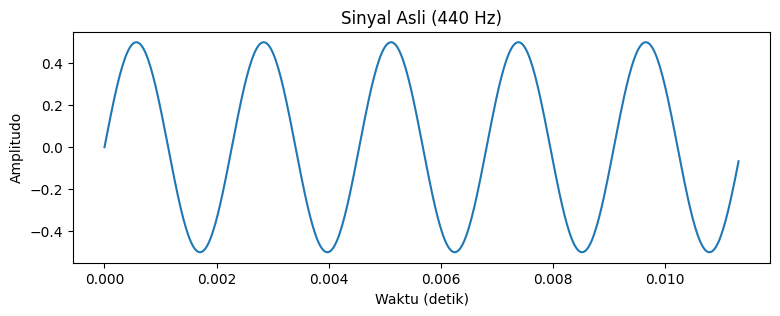

In [28]:
# Parameter dasar
fs = 44100          # sample rate
duration = 1.0      # detik
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Sinyal nada A4 = 440 Hz
sig = 0.5 * np.sin(2 * np.pi * 440 * t)

# Simpan (opsional)
sf.write("audio_asli.wav", sig, fs)

# Visualisasi segmen awal (500 sampel pertama)
plt.figure(figsize=(9,3))
plt.plot(t[:500], sig[:500])
plt.xlabel("Waktu (detik)"); plt.ylabel("Amplitudo")
show("Sinyal Asli (440 Hz)")

sinyal sinus murni berbentuk gelombang halus, frekuensi tunggal, cocok untuk eksperimen dasar.

### Penjumlahan: mixing dua nada (440 Hz + 880 Hz)

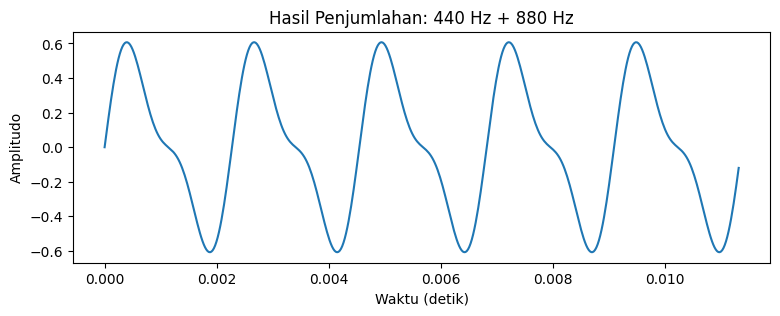

In [29]:
# Sinyal kedua (oktaf di atas) 880 Hz
sig2 = 0.2 * np.sin(2 * np.pi * 880 * t)

# Penjumlahan sinyal
sig_sum = sig + sig2

# Simpan (opsional)
sf.write("audio_penjumlahan.wav", sig_sum, fs)

# Visual
plt.figure(figsize=(9,3))
plt.plot(t[:500], sig_sum[:500])
plt.xlabel("Waktu (detik)"); plt.ylabel("Amplitudo")
show("Hasil Penjumlahan: 440 Hz + 880 Hz")

mixing = menumpuk gelombang bentuknya lebih kompleks, terdengar seperti dua nada dimainkan bareng (harmoni sederhana).

### Shift: geser waktu (delay)

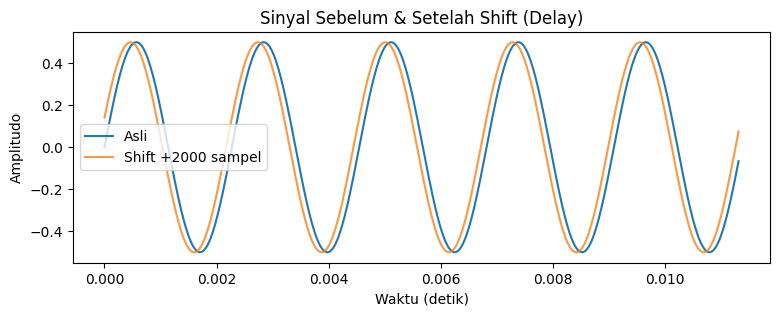

In [30]:
# Besar pergeseran (dalam sampel)
shift_samples = 2000  # ~2000/44100 ≈ 45 ms

# np.roll menggeser array secara melingkar (circular shift)
sig_shift = np.roll(sig, shift_samples)

# Simpan (opsional)
sf.write("audio_shift.wav", sig_shift, fs)

# Visual
plt.figure(figsize=(9,3))
plt.plot(t[:500], sig[:500], label="Asli")
plt.plot(t[:500], sig_shift[:500], label=f"Shift +{shift_samples} sampel", alpha=0.8)
plt.legend(); plt.xlabel("Waktu (detik)"); plt.ylabel("Amplitudo")
show("Sinyal Sebelum & Setelah Shift (Delay)")

shift waktu = efek delay. Di dunia nyata, dipakai untuk efek echo/penyelarasan sinyal multi-track.

### Amplifikasi: perbesar amplitudo (volume)

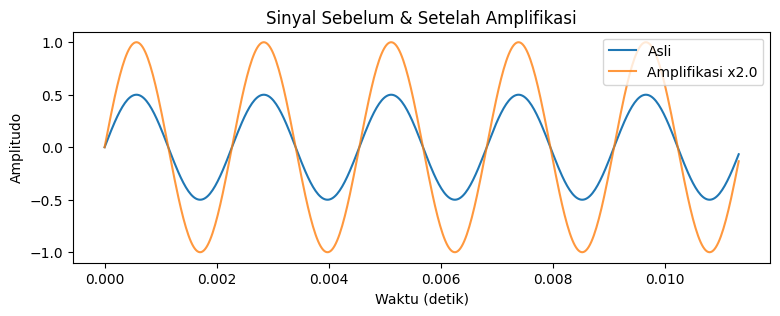

In [31]:
amp_factor = 2.0
sig_amp = amp_factor * sig

# Hindari clipping saat simpan (jaga [-1, 1])
sig_amp_clip = np.clip(sig_amp, -1.0, 1.0)
sf.write("audio_amplifikasi.wav", sig_amp_clip, fs)

# Visual
plt.figure(figsize=(9,3))
plt.plot(t[:500], sig[:500], label="Asli")
plt.plot(t[:500], sig_amp[:500], label=f"Amplifikasi x{amp_factor}", alpha=0.8)
plt.legend(); plt.xlabel("Waktu (detik)"); plt.ylabel("Amplitudo")
show("Sinyal Sebelum & Setelah Amplifikasi")

amplitudo = volume terdengar lebih kencang. Catatan teknis: terlalu besar bisa clipping (distorsi), makanya aman pakai clip saat menyimpan.

# Operasi pada Citra Digital (Gambar Produk)

### Menyiapkan gambar

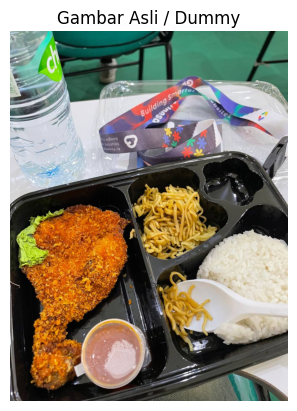

In [32]:
# Coba baca gambar produk
img_bgr = cv2.imread("/kaggle/input/tugas-4-psd-gambar/photo_2024-12-22_10-40-37.jpg")

# Jika tidak ada, buat dummy image
if img_bgr is None:
    img_bgr = np.zeros((256,256,3), dtype=np.uint8)
    cv2.putText(img_bgr, "Produk", (30,140), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 4, cv2.LINE_AA)

# Konversi BGR (OpenCV) -> RGB (Matplotlib)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

imshow_rgb(img, "Gambar Asli / Dummy")

ini baseline untuk diuji 3 operasi dasar.

### Penjumlahan: overlay warna (menambah nilai piksel)

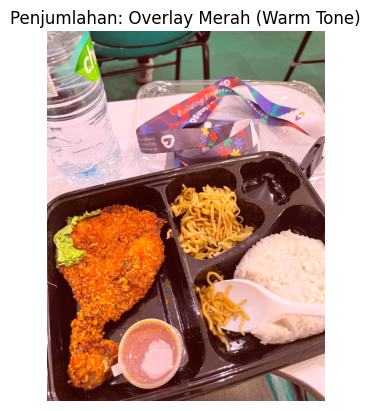

In [33]:
# Overlay merah lembut (nilai kecil supaya natural)
overlay = np.full_like(img, (40, 0, 0))  # (R, G, B)
# cv2.add lebih aman (saturasi 255) dibanding img + overlay biasa
img_sum = cv2.add(img, overlay)

imshow_rgb(img_sum, "Penjumlahan: Overlay Merah (Warm Tone)")

penjumlahan piksel = menaikkan channel tertentu yaitu nuansa warna bergeser (contoh color grading hangat untuk foto produk)

### Shift: translasi (geser posisi gambar)

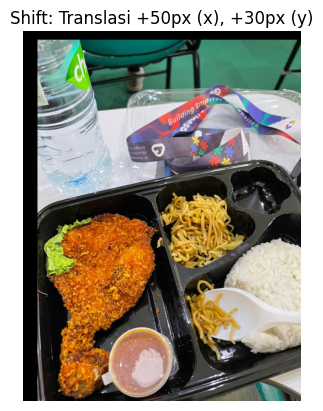

In [34]:
rows, cols, _ = img.shape

# Geser kanan 50 px, turun 30 px
M = np.float32([[1, 0, 50],
                [0, 1, 30]])
img_shift = cv2.warpAffine(img, M, (cols, rows))

imshow_rgb(img_shift, "Shift: Translasi +50px (x), +30px (y)")

translasi dipakai untuk penataan komposisi, augmentasi data (training model), atau efek animasi sederhana.

### Amplifikasi: tingkatkan brightness/kontras

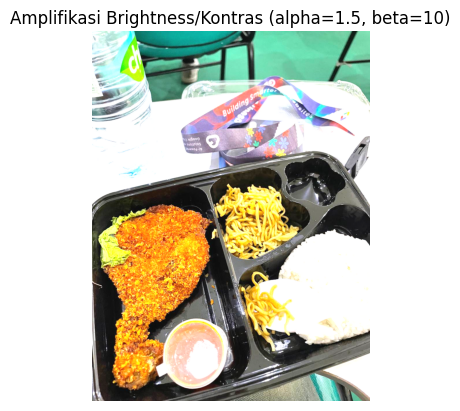

In [35]:
# Amplifikasi brightness/kontras: out = alpha*img + beta
alpha = 1.5  # kontras
beta  = 10   # brightness
img_amp = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

imshow_rgb(img_amp, f"Amplifikasi Brightness/Kontras (alpha={alpha}, beta={beta})")

meningkatkan brightness & kontras membantu menonjolkan detail produk pada foto yang underexposed.
Catatan: terlalu tinggi = highlight “pecah” (hilang detail).